# predicting TARGET CLASS
*given a classified dataset, features' names will be masked to prevent any leak of information*

**task: predict target class with optimal accuracy with the use of kNN classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


**scale data to ensure all variables hold the same weight with respect to the TARGET CLASS**

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [9]:
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
df_feat.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


**train-test split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

**check the accuracy for k=1 as control for future reference**

In [19]:
print('confusion matrix for k=1')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report for k=1')
print(classification_report(y_test,pred))

confusion matrix for k=1
[[151   8]
 [ 15 126]]


classification report for k=1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**loop with k in [1,40] to find out the optimal k-value (lowest error rate) to use**

In [20]:
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error rate')

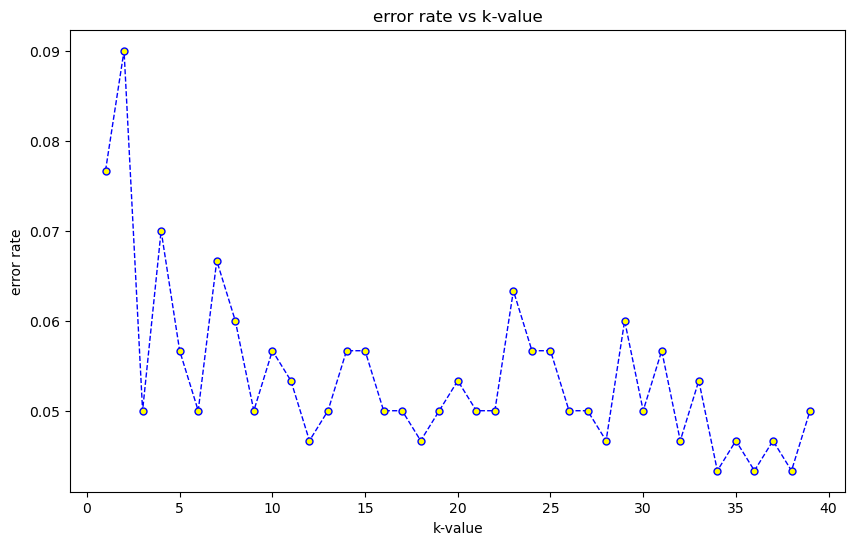

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=5, markerfacecolor='yellow')
plt.title('error rate vs k-value')
plt.xlabel('k-value')
plt.ylabel('error rate')

**chose k=34 as optimal k-value given it has the lowest error rate within range**

In [22]:
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [23]:
print('confusion matrix for k=34')
print(confusion_matrix(y_test,pred))
print('\n')
print('classification report for k=34')
print(classification_report(y_test,pred))

confusion matrix for k=34
[[153   6]
 [  7 134]]


classification report for k=34
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



**96% accuracy of prediction for both classes '0' and '1' when k=34 which is considerably higher than accuracy when k=1**